## Homework 2 for Perspective Winter 2020
### Qian Zhang

## Question 1

### Problem 1

In [2]:
import sympy as sy

# lambdify fx and fx
x=sy.symbols('x')
f_x=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
fx=sy.lambdify(x,f_x)
f_prime=sy.diff(f_x,x)
fp=sy.lambdify(x,f_prime)

In [3]:
f_prime

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

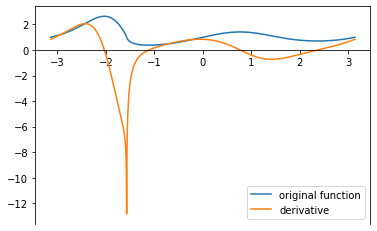

In [4]:
#draw the plot
from matplotlib import pyplot as plt
import numpy as np
import math

plt.gca().spines['bottom'].set_position('zero')

z_points=np.linspace(-math.pi,math.pi,2000)
plt.plot(z_points,fx(z_points),label='original function')
plt.plot(z_points,fp(z_points),label='derivative')
plt.legend(loc='lower right')

### Problem 2

In [5]:
# function define

def func_f1(f,x,h):
    return (f(x+h)-f(x))/h

def func_f2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def func_b1(f,x,h):
    return (f(x)-f(x-h))/h

def func_b2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def func_c2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def func_c4(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

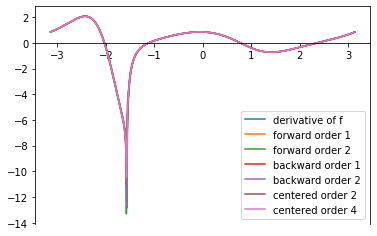

In [6]:
#plot draw

h=0.01

ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.plot(z_points,fp(z_points),label='derivative of f')
ax.plot(z_points,func_f1(fx,z_points,h),label='forward order 1')
ax.plot(z_points,func_f2(fx,z_points,h),label='forward order 2')
ax.plot(z_points,func_b1(fx,z_points,h),label='backward order 1')
ax.plot(z_points,func_b2(fx,z_points,h),label='backward order 2')
ax.plot(z_points,func_c2(fx,z_points,h),label='centered order 2')
ax.plot(z_points,func_c4(fx,z_points,h),label='centered order 4')
ax.legend()

The approximations of the derivative are extremely similar to the true one.

### Problem 3

In [7]:
#define h

h_series=np.logspace(-8,0,9)
h_series

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00])

In [8]:
# calc the errors

def func_deriv(x0):
    return fp(x0)

x_0=1

er_f1=abs(func_deriv(x_0)-func_f1(fx,x_0,h_series))
er_f2=abs(func_deriv(x_0)-func_f2(fx,x_0,h_series))
er_b1=abs(func_deriv(x_0)-func_b1(fx,x_0,h_series))
er_b2=abs(func_deriv(x_0)-func_b2(fx,x_0,h_series))
er_c2=abs(func_deriv(x_0)-func_c2(fx,x_0,h_series))
er_c4=abs(func_deriv(x_0)-func_c4(fx,x_0,h_series))

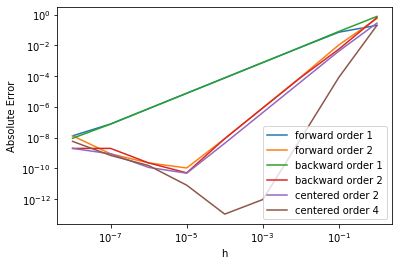

In [9]:
#plot draw

ax=plt.gca()
ax.loglog(h_series,er_f1,label='forward order 1')
ax.loglog(h_series,er_f2,label='forward order 2')
ax.loglog(h_series,er_b1,label='backward order 1')
ax.loglog(h_series,er_b2,label='backward order 2')
ax.loglog(h_series,er_c2,label='centered order 2')
ax.loglog(h_series,er_c4,label='centered order 4')
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.legend(loc="lower right")

### Problem 4

In [10]:
# load the degrees and convert

dt=np.load('plane.npy')
time=dt[:,0]
alpha_deg=dt[:,1]
beta_deg=dt[:,2]

alpha_rad=np.deg2rad(alpha_deg)
beta_rad=np.deg2rad(beta_deg)
print(alpha_rad)
print(beta_rad)

[0.9817477  0.96918133 0.95644043 0.94352499 0.93095862 0.91961398
 0.90652401 0.89500484]
[1.17879538 1.16186568 1.14476146 1.12730816 1.11037847 1.09501957
 1.07721721 1.06150925]


In [11]:
speed=np.zeros(8)

In [12]:
# calc the coor
x_coor=500*(np.tan(beta_rad))/(np.tan(beta_rad)-np.tan(alpha_rad))
y_coor=500*(np.tan(beta_rad)*np.tan(alpha_rad))/(np.tan(beta_rad)-np.tan(alpha_rad))

print(x_coor)
print(y_coor)

[1311.2713366  1355.9364762  1401.91839832 1450.49700629 1498.64035029
 1543.79895461 1598.04138183 1647.59609291]
[1962.45623878 1975.11450516 1987.34601606 2000.84071299 2013.51241079
 2025.7922335  2040.99058265 2055.06557068]


In [13]:
# for t=7 diff
h=1
x7_p=(x_coor[0+h]-x_coor[0])/h
y7_p=(y_coor[0+h]-y_coor[0])/h
spd_7=np.sqrt(x7_p**2+y7_p**2)
speed[0]=spd_7

In [14]:
# for t=14 diff
x14_p=(x_coor[-1]-x_coor[-1-h])/h
y14_p=(y_coor[-1]-y_coor[-1-h])/h
spd_14=np.sqrt(x14_p**2+y14_p**2)
speed[-1]=spd_14

In [15]:
# for t=8 to 13 diff
for i in range(1,7):
    xi_p=(x_coor[i+h]-x_coor[i-h])/(2*h)
    yi_p=(y_coor[i+h]-y_coor[i-h])/(2*h)
    spd_i=np.sqrt(xi_p**2+yi_p**2)
    speed[i]=spd_i

In [16]:
# speed from t=7 to 14
for i in range(8):
    print ('The speed at time={} is {}'.format(i+7,speed[i]))


The speed at time=7 is 46.4242006221338
The speed at time=8 is 47.00103938095341
The speed at time=9 is 48.99880514036797
The speed at time=10 is 50.09944162965227
The speed at time=11 is 48.290350838204915
The speed at time=12 is 51.5645590492722
The speed at time=13 is 53.923033545053535
The speed at time=14 is 51.51480056963696


### Problem 5

In [26]:
def func_j(ff,x0,h):
    var=[]
    for fi in ff:
        for va in fi.atoms(sy.Symbol):
            if va not in var:
                var.append(va)

    I = np.identity(len(x0))
    J = sy.zeros(len(ff),len(x0))
    for i,fi in enumerate(ff):
        for j,va in enumerate(var):
            f=sy.lambdify(tuple(var),fi)
            a=(x0+h*I[:,j])
            b=(x0-h*I[:,j])
            temp=(f(*a)-f(*b))/(2*h)
            J[i,j]=temp
    return J
        

In [27]:
#test function
x=sy.symbols('x')
y=sy.symbols('y')
f_xy=[x**2,x**3-y]

In [28]:
func_j(f_xy,[1,1],0.0001)

Matrix([
[1.99999999999922,               0.0],
[3.00000000999945, -0.99999999999989]])

In [29]:
# verify the result

f1p_x=sy.diff(f_xy[0],x)
f1p_y=sy.diff(f_xy[0],y)
f2p_x=sy.diff(f_xy[1],x)
f2p_y=sy.diff(f_xy[1],y)

# lambdify
f1px=sy.lambdify((x,y),f1p_x)
f1py=sy.lambdify((x,y),f1p_y)
f2px=sy.lambdify((x,y),f2p_x)
f2py=sy.lambdify((x,y),f2p_y)

J_test=np.array([[f1px(1,1),f1py(1,1)],[f2px(1,1),f2py(1,1)]])


In [30]:
J_test

array([[ 2,  0],
       [ 3, -1]])

The result is the same.

### Problem 7

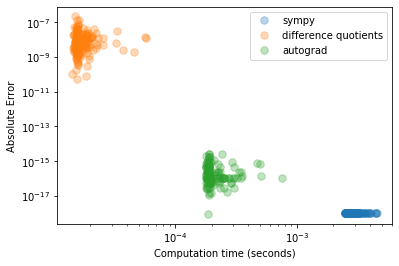

In [22]:
import random
import time
def func_exp(n):
    h=1e-8
    time_sy=np.zeros(0)
    er_sy=np.zeros(0)
    time_quo=np.zeros(0)
    er_quo=np.zeros(0)
    time_grad=np.zeros(0)
    er_grad=np.zeros(0)
    
    for i in range(n):
        
        x0=random.uniform(-math.pi,math.pi)

        #sympy
        
        start=time.perf_counter()
        f_prime=sy.diff(f_x,x)
        fp=sy.lambdify(x,f_prime)
        value=fp(x0)
        er_sy=np.append(er_sy,1e-18)
        end=time.perf_counter()
        time_sy=np.append(time_sy,end-start)
        
        #center quotient
        
        start=time.perf_counter()
        er=abs(func_c4(fx,x0,h)-value)
        end=time.perf_counter()
        time_quo=np.append(time_quo,end-start)
        er_quo=np.append(er_quo,er)
        
        #autograd
        import autograd
        from autograd import numpy as anp
        fxx=lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
        start=time.perf_counter()
        dydx=autograd.grad(fxx)
        value2=dydx(x0)
        er2=abs(value2-value)
        end=time.perf_counter()
        time_grad=np.append(time_grad,end-start)
        er_grad=np.append(er_grad,er2)
        
    #print(er_quo)
    ax=plt.gca()
    ax.loglog(time_sy,er_sy,'.',markersize=15,alpha=0.3,label='sympy')
    ax.loglog(time_quo,er_quo,'.',markersize=15,alpha=0.3,label='difference quotients')
    ax.loglog(time_grad,er_grad,'.',markersize=15,alpha=0.3,label='autograd')
    ax.legend()
    plt.xlabel('Computation time (seconds)')
    plt.ylabel('Absolute Error')
n=200
func_exp(n)
    